# Flight Price Prediction

# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Objective:
    
    To build a machine learning model to predict the price of the flight ticket. 

In [106]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import scikitplot as skplt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pyfiglet

import pickle
import joblib


# Loading the Dataset

In [107]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Remarks: Here the column 'Price" is our target column making all the remaining columns as our features using which we need to predict our label. Since the values present in the "Price" column has continous data which makes it a Regression problem.

In [108]:
#checking the dimension of the dataset
df_train.shape

(10683, 11)

# Data Exploration/Analysis

In [109]:
#checking the first 5 entries of the dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [110]:
#checking the last 5 entries of the dataset
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [111]:
#checking column names
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [112]:
#checking the datatype information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [113]:
#checking for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

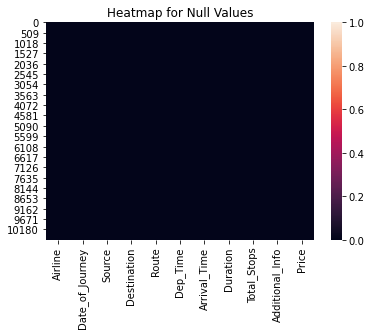

In [114]:
#visualizing the null count with heatmap
sns.heatmap(df_train.isnull())
plt.title("Heatmap for Null Values")
plt.show()

Remarks: We see that there are 2 columns with only one missing value in the dataset.

In [115]:
#checking unique values
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Remarks: In the above cell, we can see the number of unique values each column of our dataset contains.

# Statistical Analysis

In [116]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Remarks: The describe method shows only the numeric datatype information. As there is only one numeric column i.e., 'price' in our dataset, so it's giving information about that single column while the other columns got ingnored. 

# Data Pre-processing

In [117]:
def preprocess(df):
  df=df.copy()
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
  df['Year_of_Journey']=df['Date_of_Journey'].dt.year
  df['Month_of_Journey']=df['Date_of_Journey'].dt.month
  df['Day_of_Journey']=df['Date_of_Journey'].dt.day
  df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
  df=df.drop(['Route','Date_of_Journey','Duration'],axis=1)
  return df

Remarks:
    
1. In the above cell, we have converted the 'Date_of_journey' column into Year, Month and day and then dropping it.

2. We have also filled the missing value in the Total_stops column.

3. We have dropped the columns Route and duration as they are not providing much insight for our model prediction.

In [119]:
def preprocess1(df):
  df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
  df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
  df=df.drop(['Dep_Time'],axis=1)
  df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
  df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
  df=df.drop(['Arrival_Time'],axis=1)
  return df

Remarks:

1. In the above cell, we have converted the Dep_Time column into departure hour and minute. and then dropping the Dep_Time column.

2. We have also converted the Arrival_Time column into arrival hour and minute; and then dropping the Arrival_Time column.

In [120]:
#checking the dataset
df_train=preprocess1(df_train)
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,2019,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,2019,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,2019,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,2019,1,3,11,30,14,10


# Exploratory Data Analysis(EDA)

# Univariate Analysis:

In [121]:
def countplot(x):
  plt.figure(figsize=(12,8))
  sns.countplot(x)
  plt.xticks(rotation=90,fontsize=14)
  plt.yticks(fontsize=14)
  return plt.show()

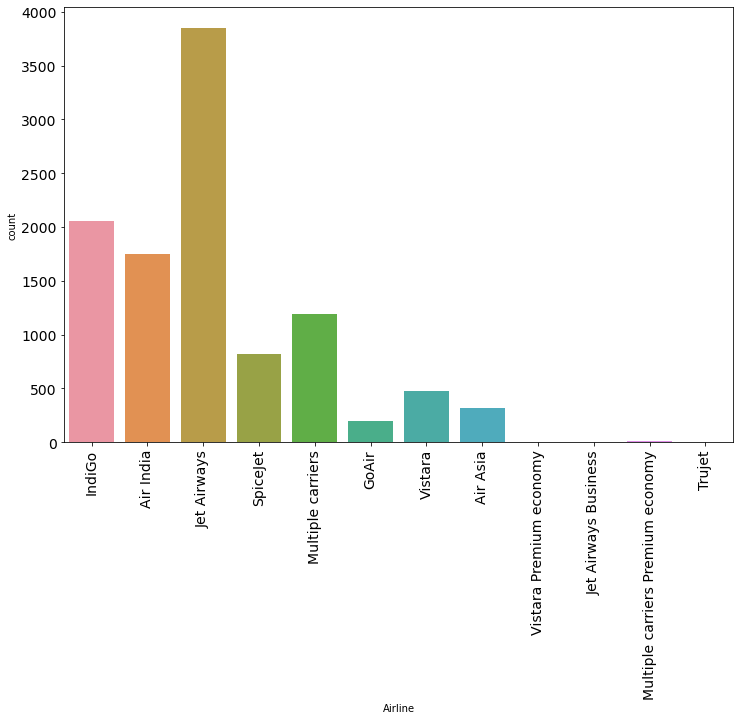

In [122]:
#checking countplot of Airline feature
countplot(df_train['Airline'])

Observation: We can see in the above cell that, the count for Jet Airways is the highest which means that mostly people travelled in Jet Airways, followed by Indigo and AirIndia. Less people travelled with GoAir.

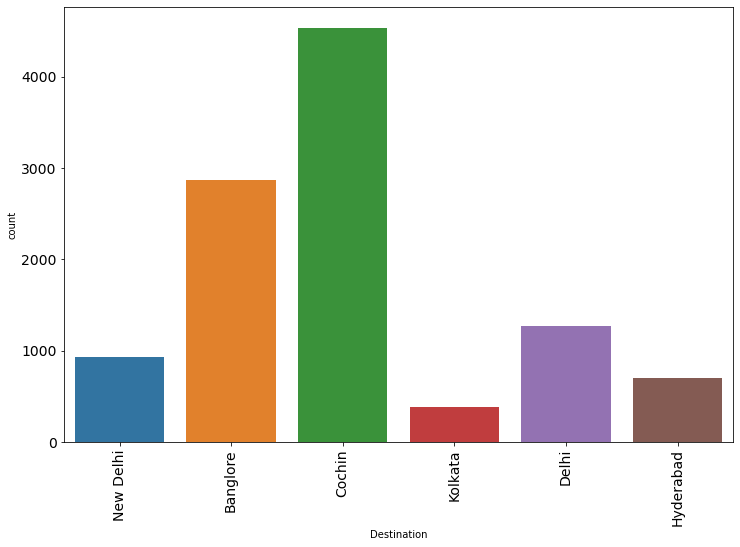

In [123]:
countplot(df_train['Destination'])

Observation: We can see from above that-

1. Majority of the people travelled to Cochin which is followed by Bangalore and Delhi.

2. Lesser people travelled to Kolkata.

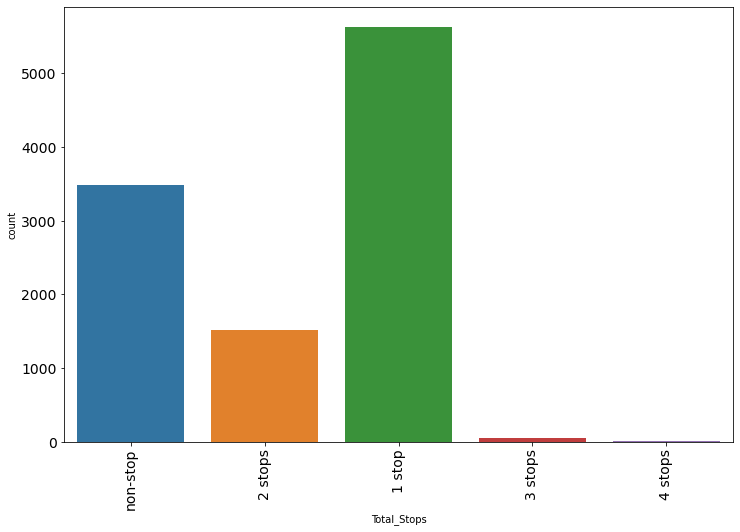

In [124]:
countplot(df_train['Total_Stops'])

Observation: From the above countplot, we can see that-

1. Majority of the people travelled in the flights having only one stop.

2. Around 3500 people chose non-stop flights.

3. Around 1500 people travelled in flights having 2 stops.

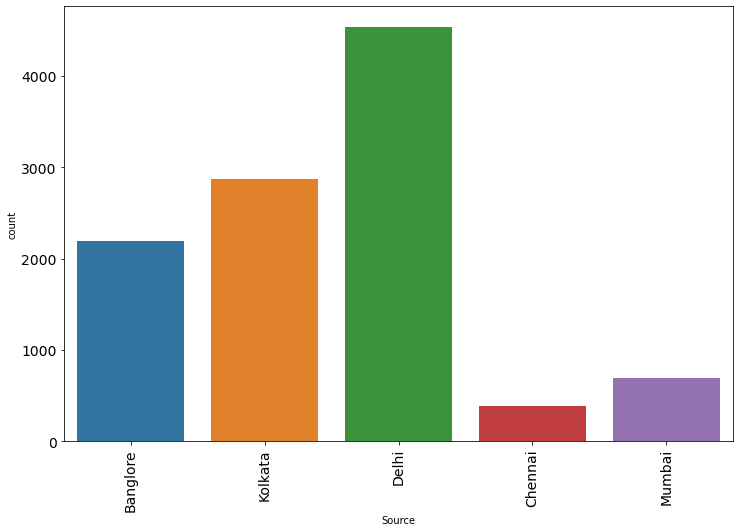

In [125]:
countplot(df_train['Source'])

Observation: From the above plot, we can see that-

1. Majority of the flights travelled from Delhi to various destinations, followed by Kolkata and Bangalore.

2. Less than 1000 flights travelled from Mumbai and Chennai.

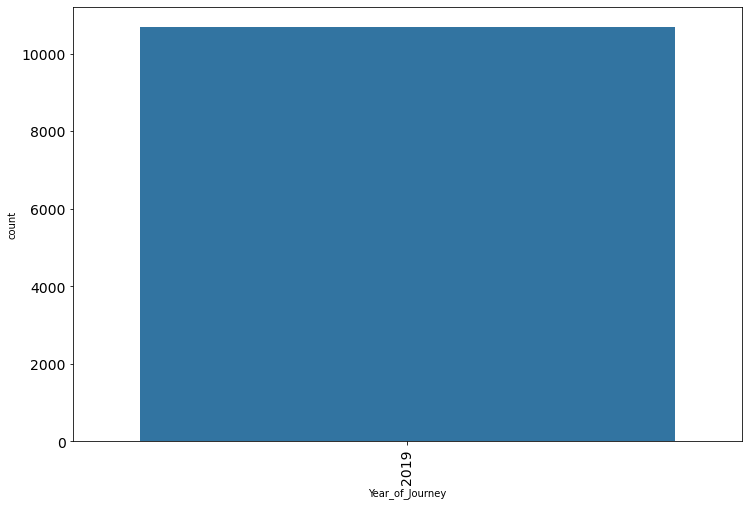

In [126]:
countplot(df_train['Year_of_Journey'])

Remarks: We can see that there is only 2019 journey data is present in our dataset.

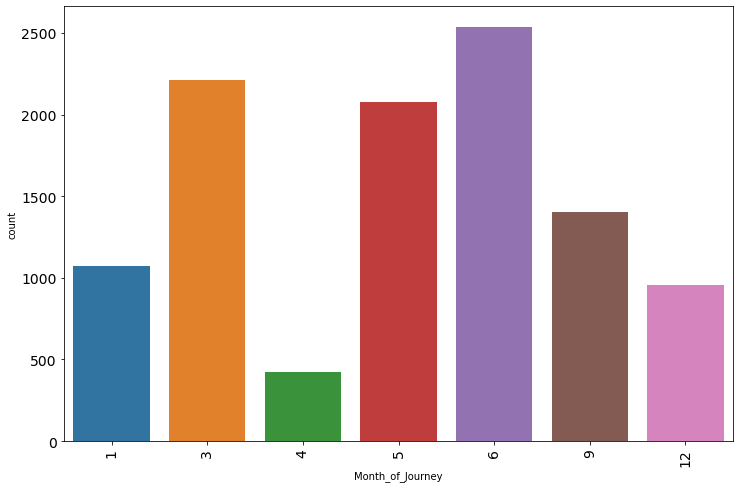

In [127]:
countplot(df_train['Month_of_Journey'])

Observation: From the above plot, we can see that-
    
    1. The highest number of people travelled in the month of June followed by March, May and September.
    
    2. Around 1000 people travelled in the month of January and December.
    
    3. Less than 500 people travelled in the month of April.

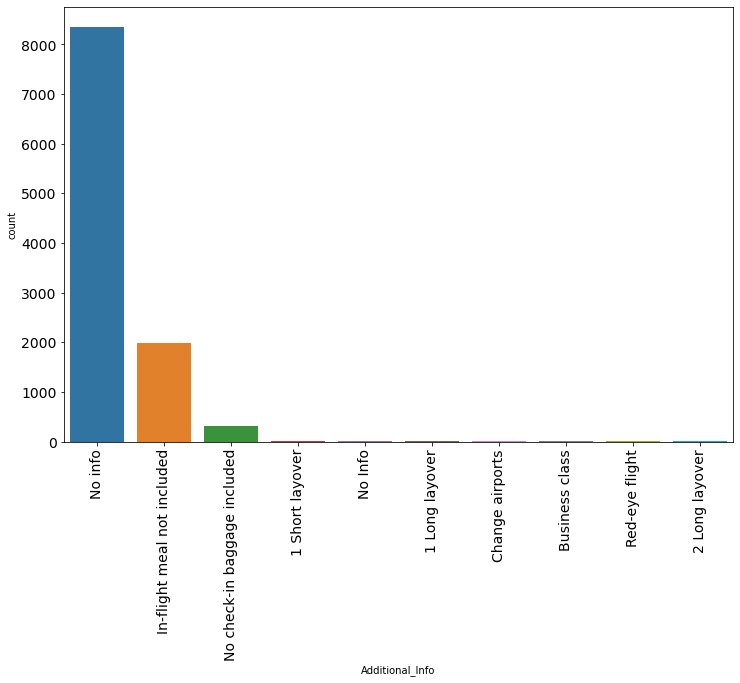

In [128]:
countplot(df_train['Additional_Info'])

Observation: From the above plot, we can see that

1. No info has the highest count about more than 8000.

2. 'In-flight meal not included' has around 2000 counts followed by 'No check-in baggage included' havinh less than 500 counts. While the rest have very less to negligible counts.

In [150]:
def pie_diagram(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

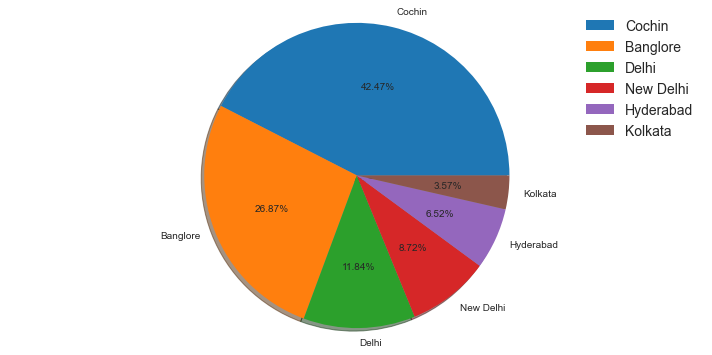

In [156]:
pie_diagram(df_train['Destination'])

Observation: From the above plot, we see that the highest number of rows(42.47%) covered by Cochin and the lowest number (3.57%) of rows covered by Kolkata.

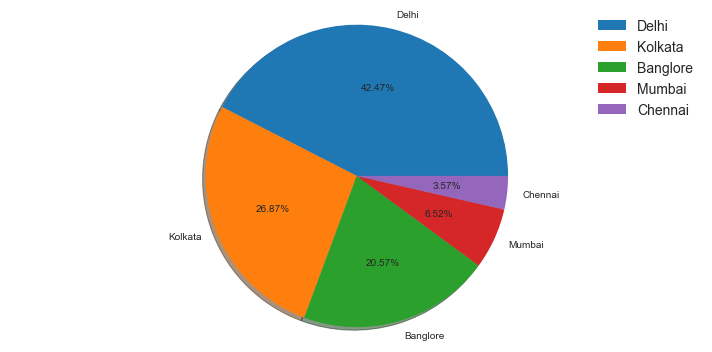

In [157]:
pie_diagram(df_train['Source'])

Observation: From the above plot we can say that the highest number of rows (42.47%) is covered by Delhi and the lowest number of rows (3.57%) covered by Chennai

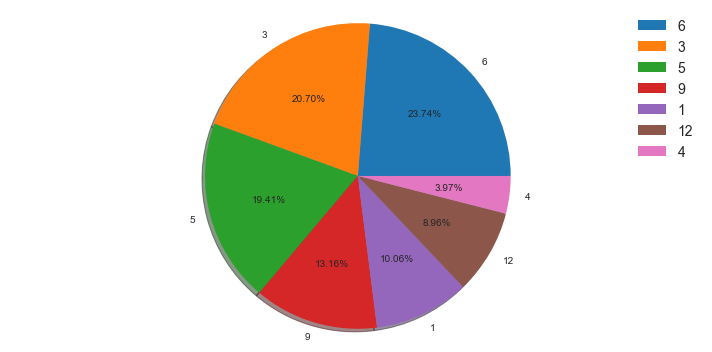

In [153]:
pie_diagram(df_train['Month_of_Journey'])

Observation: From the above plot, we see that most of the journey made by people were in the month of June(23.74%) and least in the month of April(3.97%)

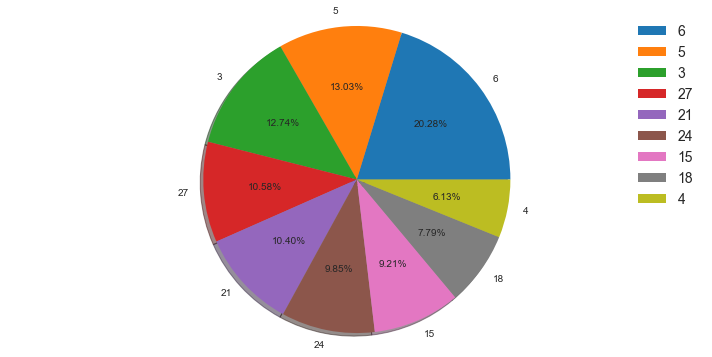

In [158]:
pie_diagram(df_train['Day_of_Journey'])

 Observation: From the above plot, we can see that most of the people were travelled on dates 6,5 and the least travelling dates are for 4,18.

# Bivariate Analysis:

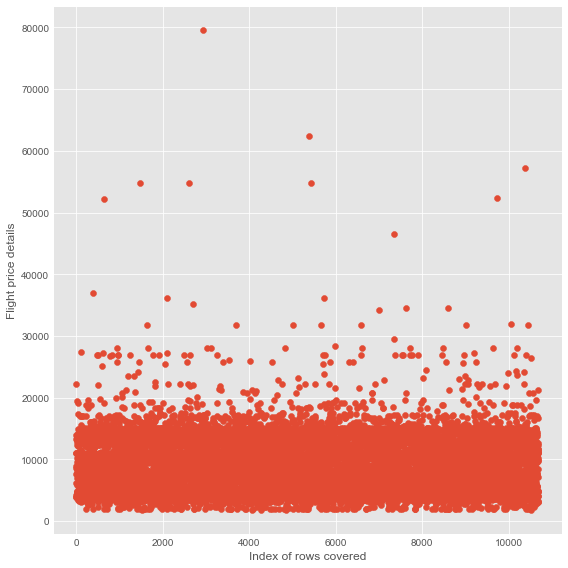

In [161]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(df_train.index, df_train['Price'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

Observation: In the above plot, we can see that most of the flight price values are accumulated between 0-20000 and few data points are distributed above.

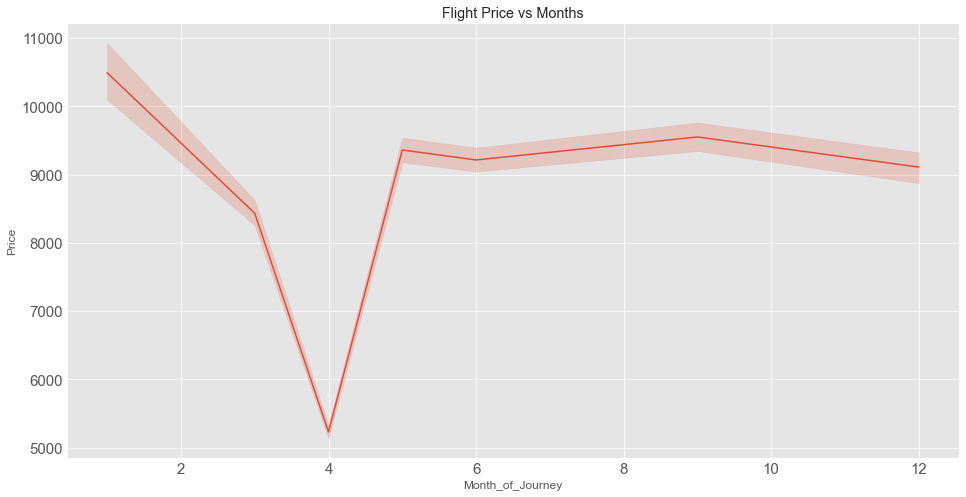

In [165]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Month_of_Journey',y='Price',data=df_train)
plt.title("Flight Price vs Months")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Obseravtion: From the above plot, we see that the flight price was highest in the first month, then it started to decrease gradually till it reached 4th month and then again it started to rise till 5th month and after that the price was almost stable till 12th month.

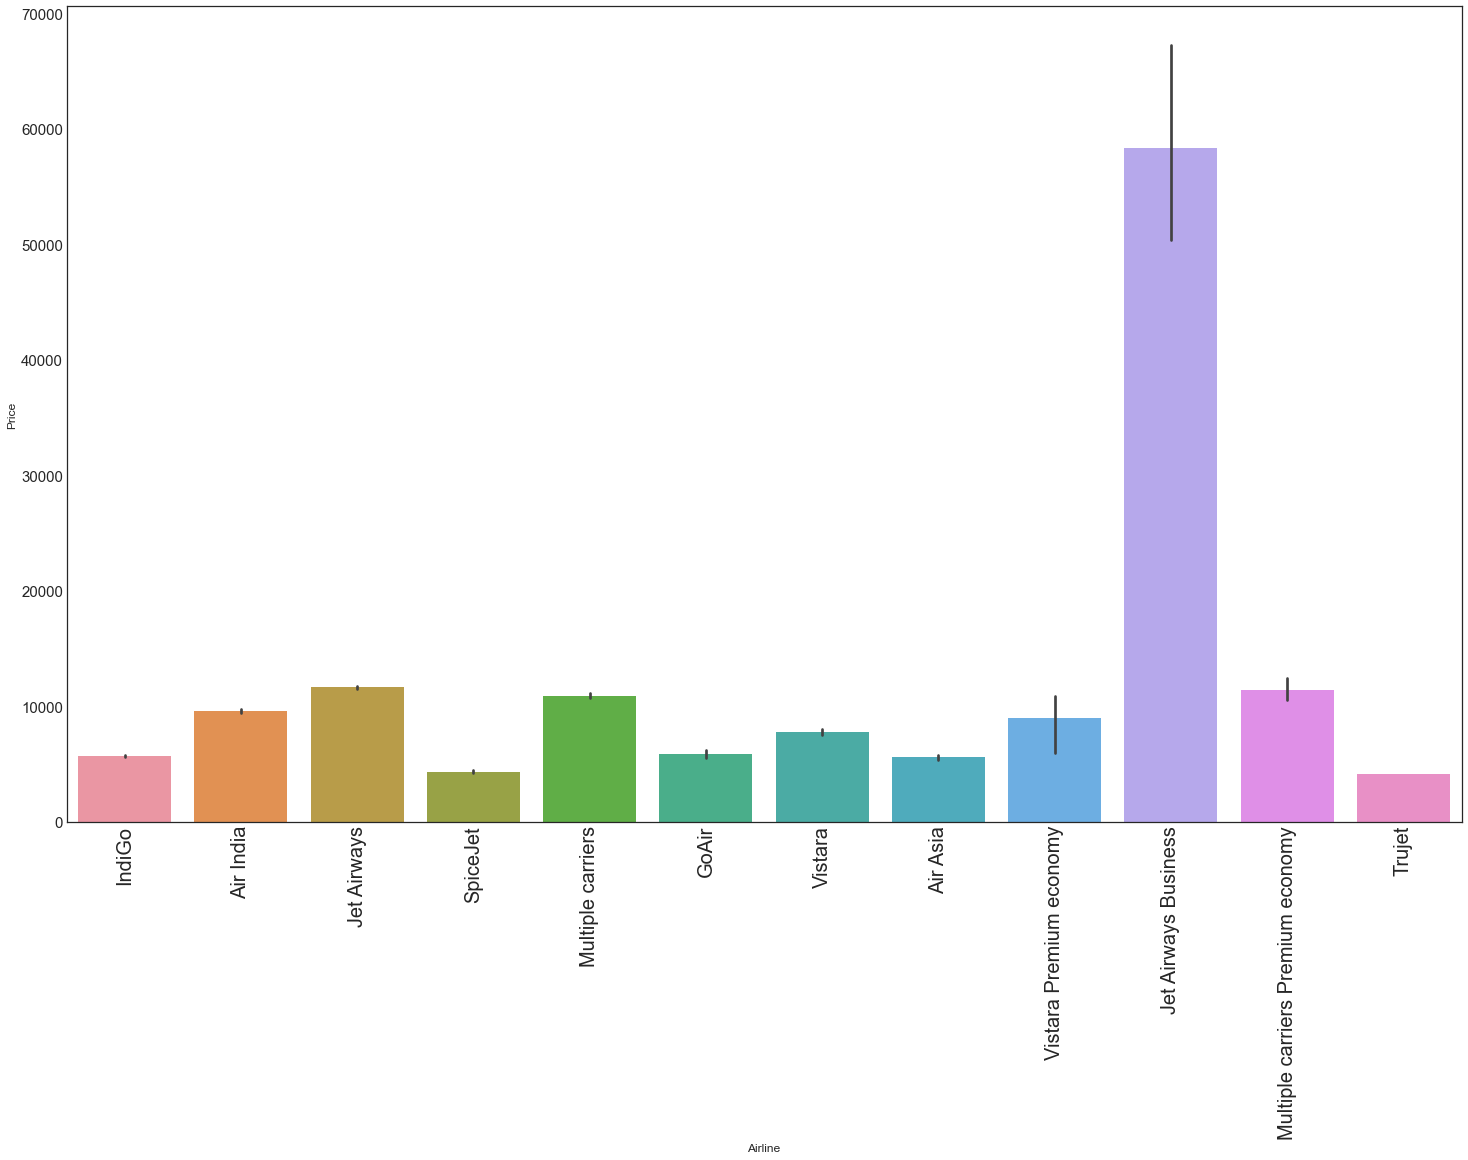

In [171]:
plt.style.use('seaborn-white')
plt.figure(figsize=(25,15))
sns.barplot(x='Airline',y='Price',data=df_train)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=15)
plt.show()

Observation: from the above plot we can see that-

1. the flight ticket price was highest for the Jet Airways Business.

2. Jet Airways ,Mutiple carriers,Mutiple carriers Premium economy, vistara premium, vistara, and Air India have medium price tickets i.e., nor too high neither low.

3. Spicejet,Indigo,GoAir,Air Asia and Trujet was offering the cheapest flight ticket.

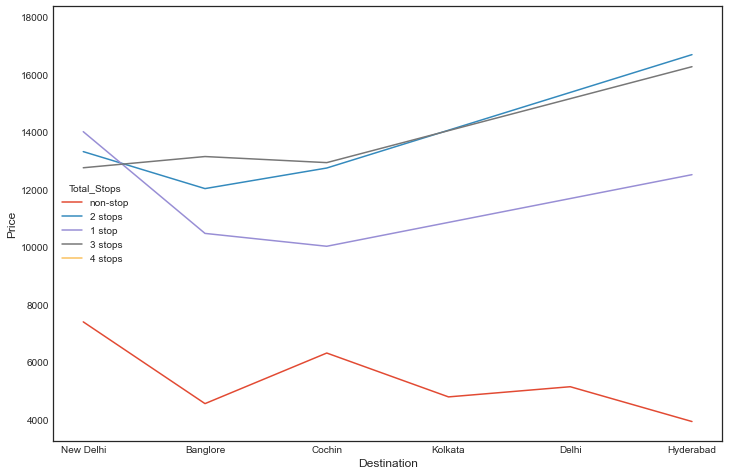

In [191]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df_train, ci=None)
plt.show()

Observation: From the above plot, we can see that non stop flights have lower price irrespective of the destination as compared to flights that have 1 or more stops before reaching the final destination.

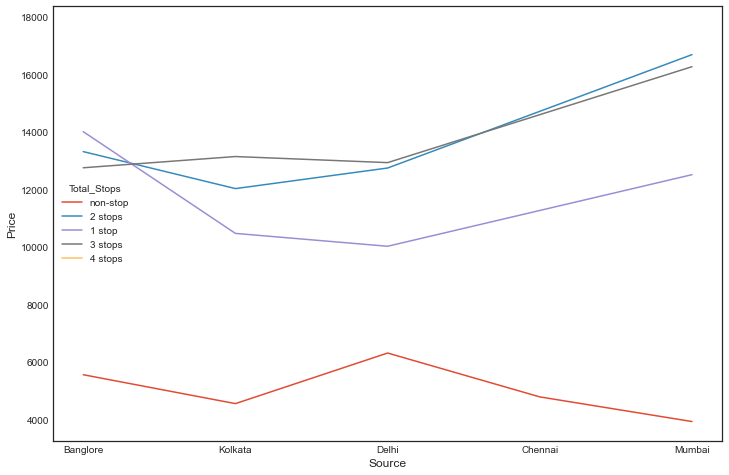

In [190]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that non stop flights have lower price irrespective of the source as compared to flights that have 1 or more stops.

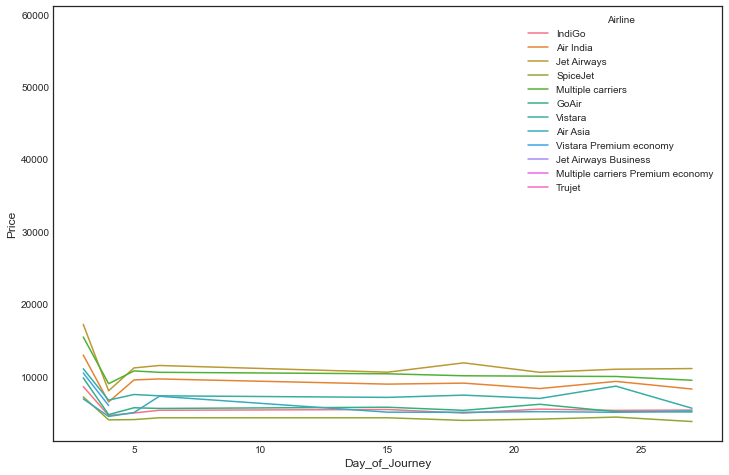

In [189]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)
plt.show()

Observation: From the above plot, we see that all the airlines have high price between 1-5th day of each month and than  reduces a bit for the remaining days of the month.

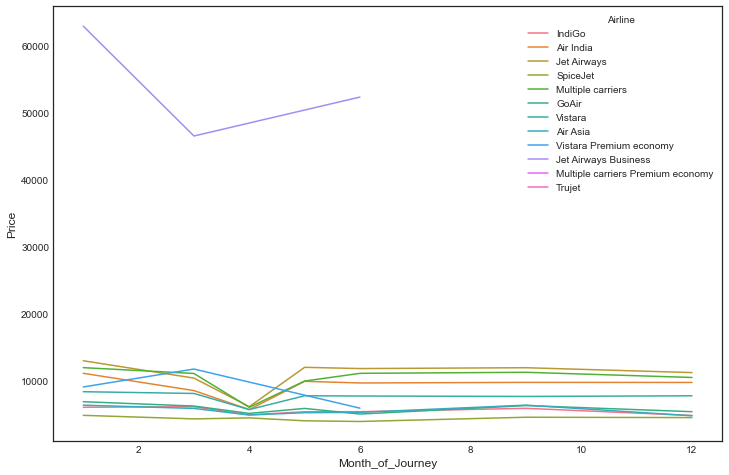

In [188]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that 'Jet Airways Business class' has the highest price than the rest probably because the remaining flights offer the economy class as well.

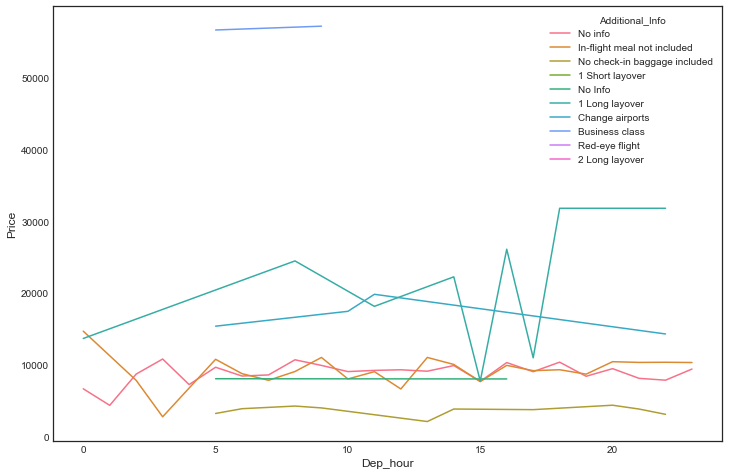

In [187]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dep_hour', y='Price', hue='Additional_Info', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that 'Business class' has high price and it's departure hour is between 5-10; the second highest pricing is for '1 Long layover' with a spike in between 17-22 departure hour.

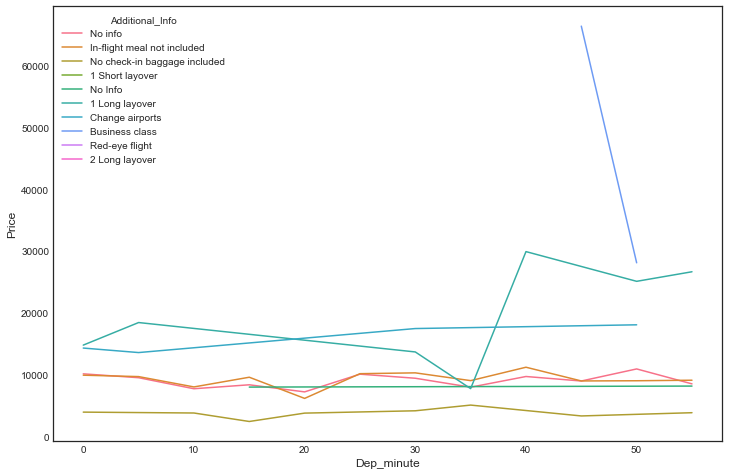

In [186]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dep_minute', y='Price', hue='Additional_Info', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that 'Business class' has high price and has data coverage for departure minutes between 45-50 minutes roughly. '1 Long layover' has a spike at 40min and it stays almost like that till 50+ mins.

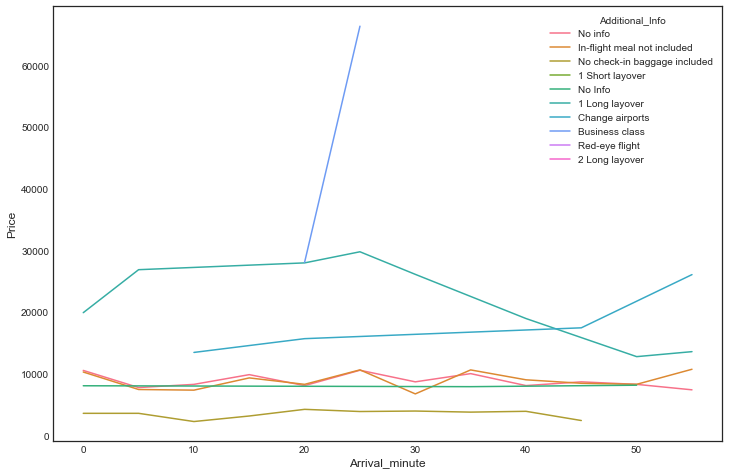

In [185]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Arrival_minute', y='Price', hue='Additional_Info', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that 'Business class' again has an exponential rise in price and the arrival minutes mostly range between 20-30 minutes. Next, '1 Long layover' has the second highest price having a spike at the 25th arrival minute and then the price starts to decrease.

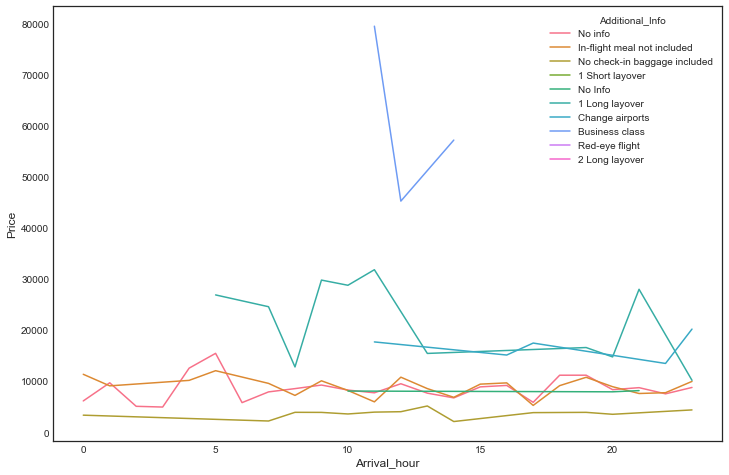

In [184]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Arrival_hour', y='Price', hue='Additional_Info', data=df_train, ci=None)
plt.show()

Observation: In the above plot, we see that price for 'business class' is highest as compared to 'No check-in bag included' being the least during arrival hour. The arrival hour for 'Business class' is spread only between 10-15 while for 'No check-in bag included' it is spread between the entire range.

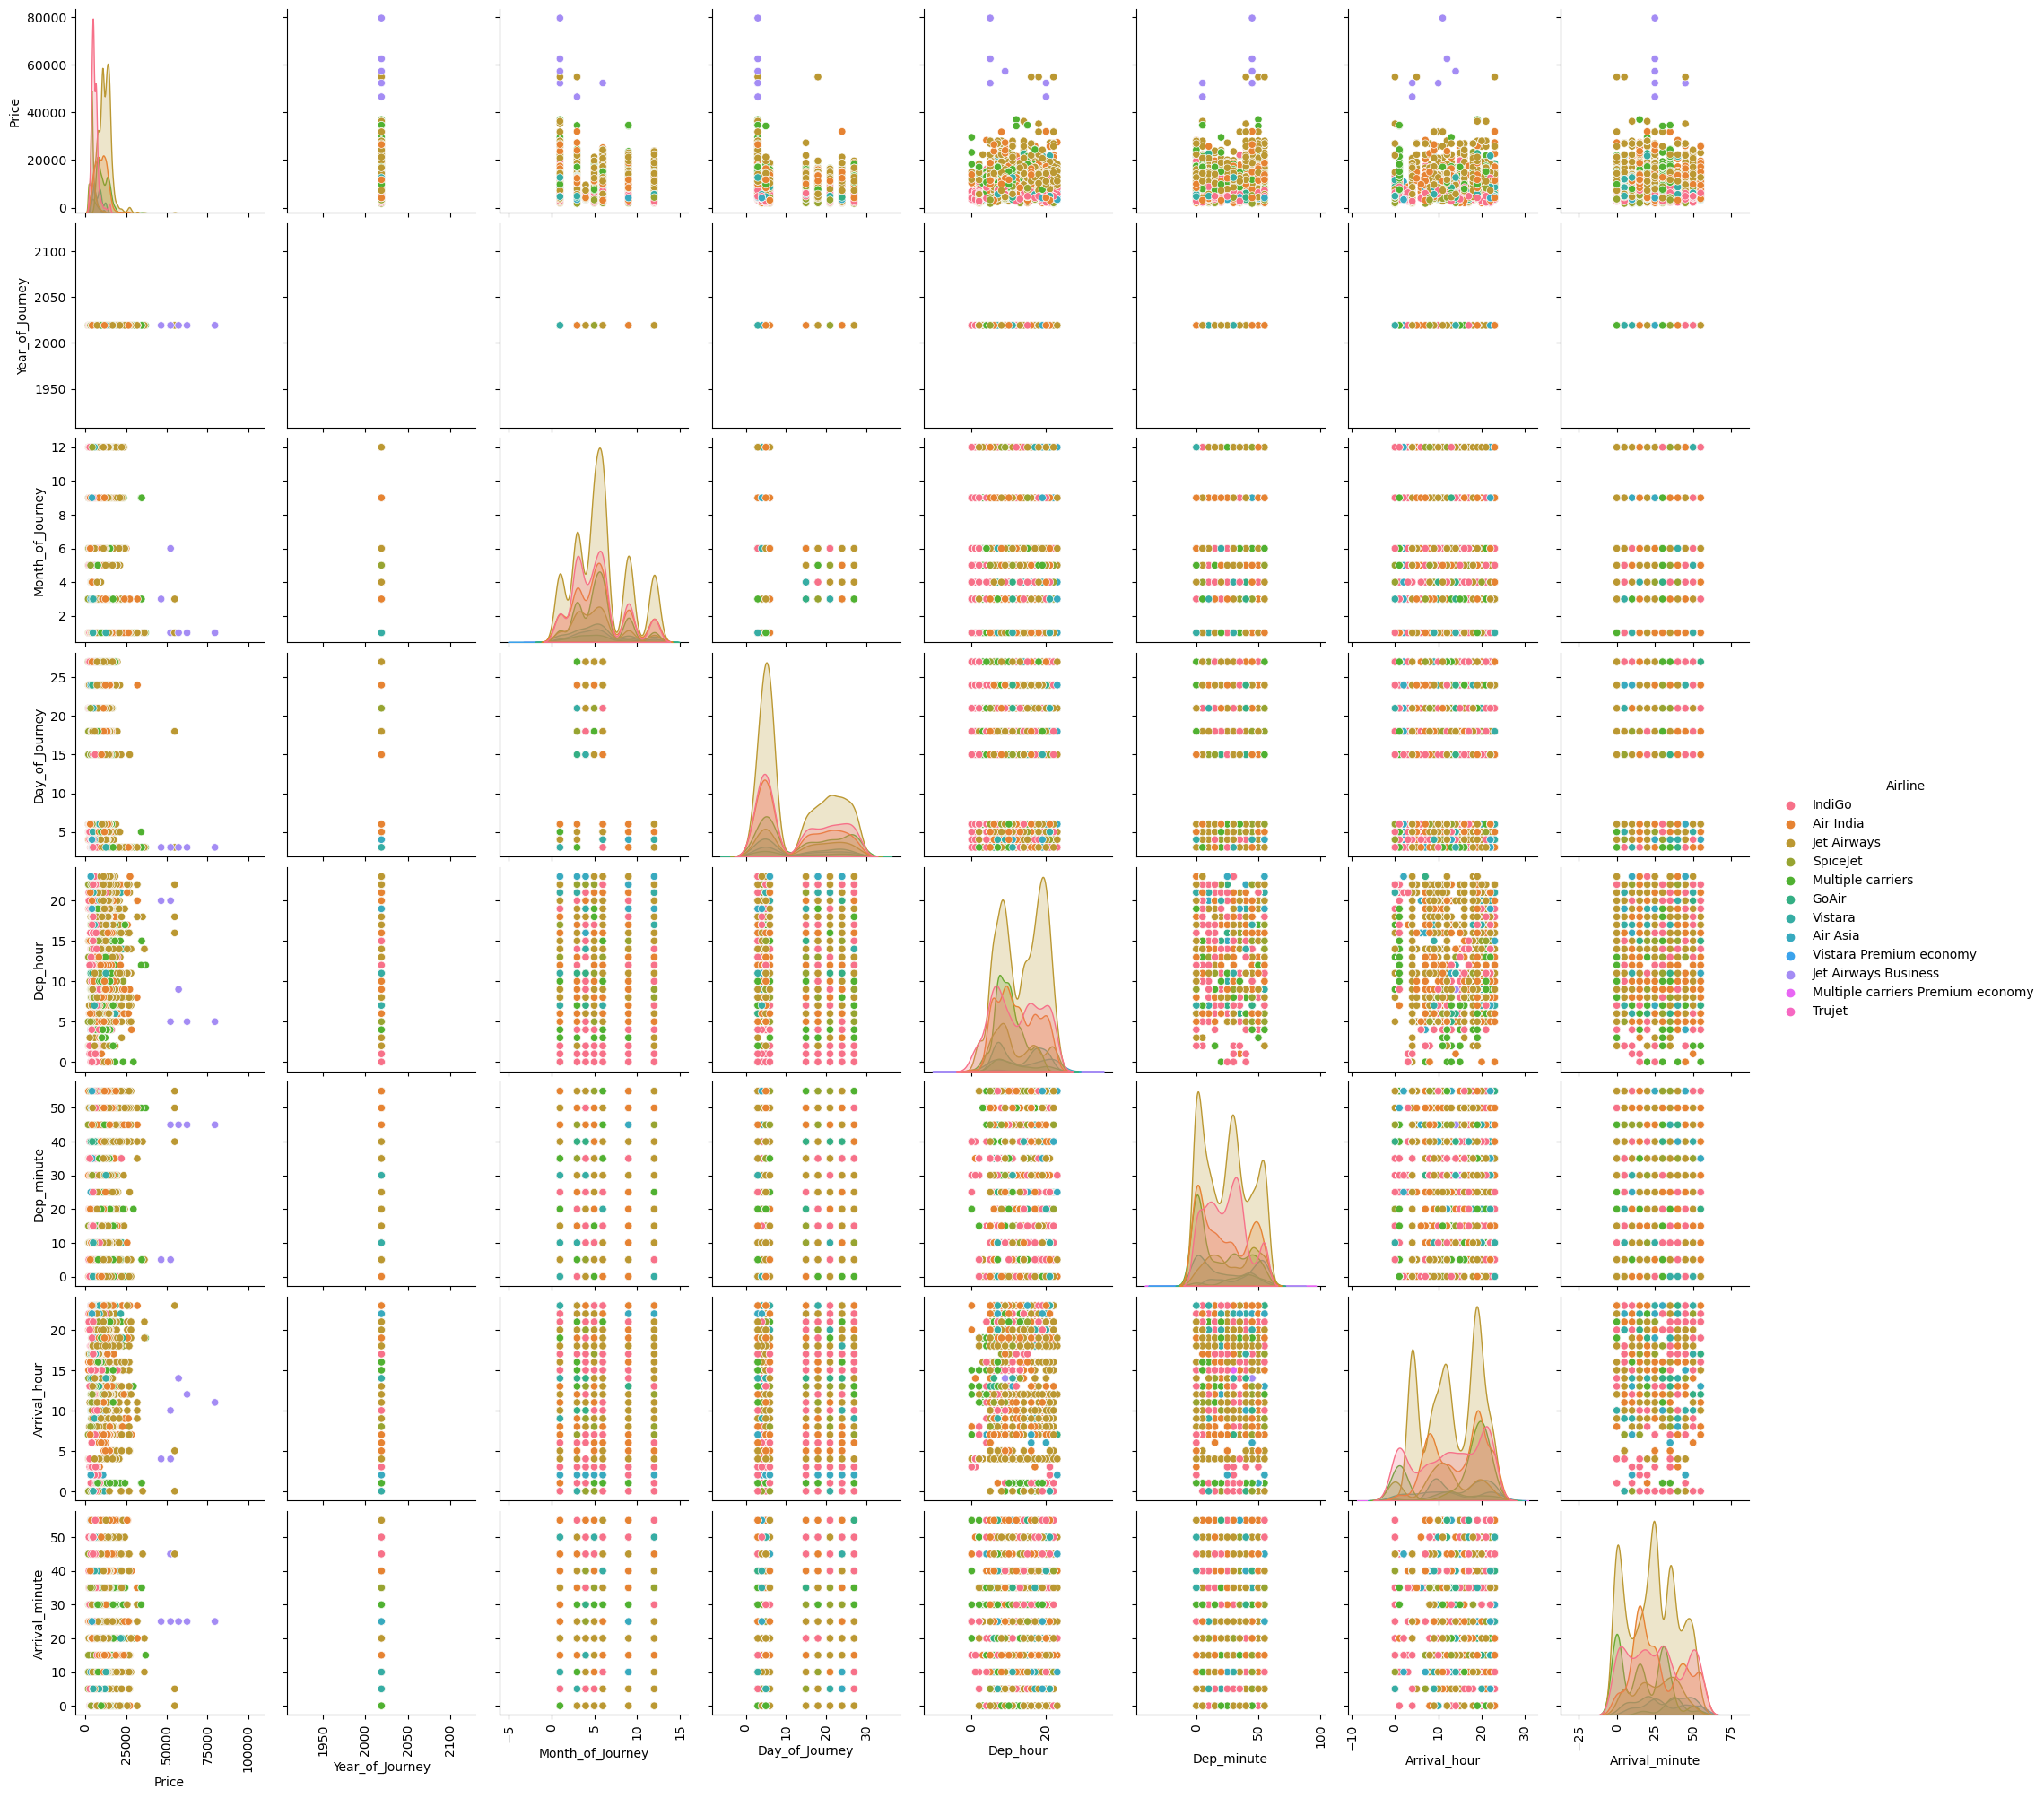

In [192]:
plt.style.use('default')
g = sns.pairplot(df_train, hue='Airline', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

Observation: The above pairplot gives an indication on the numerical data considering the different airlines present in our dataset.

# Encoding the categorical columns:

In [193]:
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df

df_train=ordinal_encoder(df_train,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

Remarks:Here we are using the OrdinalEncoder method for encoding the categorical features since all the features have values in an orderly manner.

In [196]:
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,3.0,0.0,5.0,4.0,8.0,3897,2019,3,24,22,20,1,10
1,1.0,3.0,0.0,1.0,8.0,7662,2019,1,5,5,50,13,15
2,4.0,2.0,1.0,1.0,8.0,13882,2019,9,6,9,25,4,25
3,3.0,3.0,0.0,0.0,8.0,6218,2019,12,5,18,5,23,30
4,3.0,0.0,5.0,0.0,8.0,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,4.0,8.0,4107,2019,9,4,19,55,22,25
10679,1.0,3.0,0.0,4.0,8.0,4145,2019,4,27,20,45,23,20
10680,4.0,0.0,2.0,4.0,8.0,7229,2019,4,27,8,20,11,20
10681,10.0,0.0,5.0,4.0,8.0,12648,2019,1,3,11,30,14,10


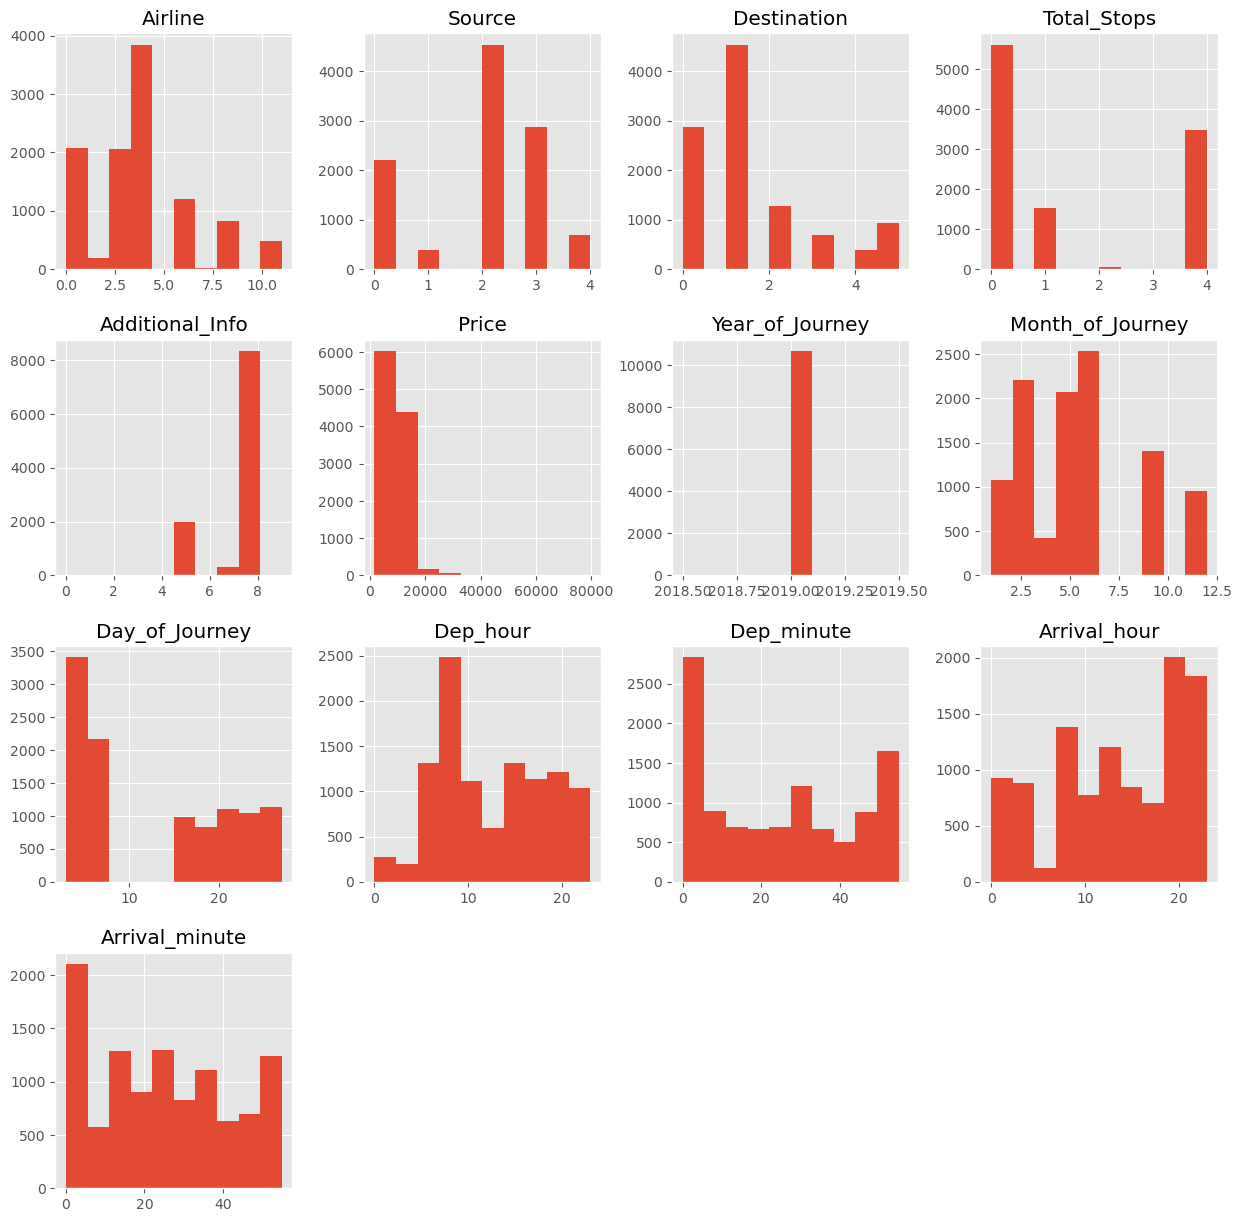

In [194]:
#checking the data distribution in our columns encoding 
plt.style.use('ggplot')
df_train.hist(figsize=(15,15))
plt.show()

# Splitting the dataset into dependent and independent variables:

In [205]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

In [206]:
#Dropping the column Year_of_Journey as it has only one value i.e., 2019
X=X.drop(['Year_of_Journey'],axis=1) 

# Splitting data for model building using train test split:

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Multivariate Analysis:

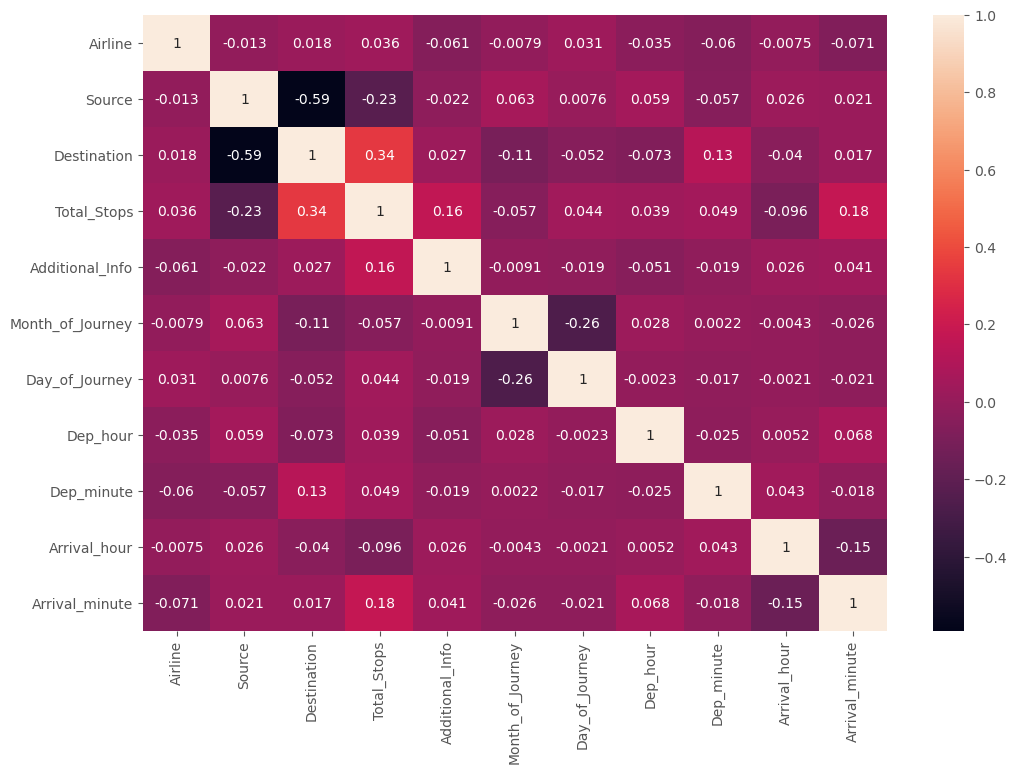

In [209]:
#Checking Correlation
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)
plt.show()

Observation: From the above heatmap, we can say that most of the columns are having less correlation and there is no multi-collinearity concerns in the dataset.

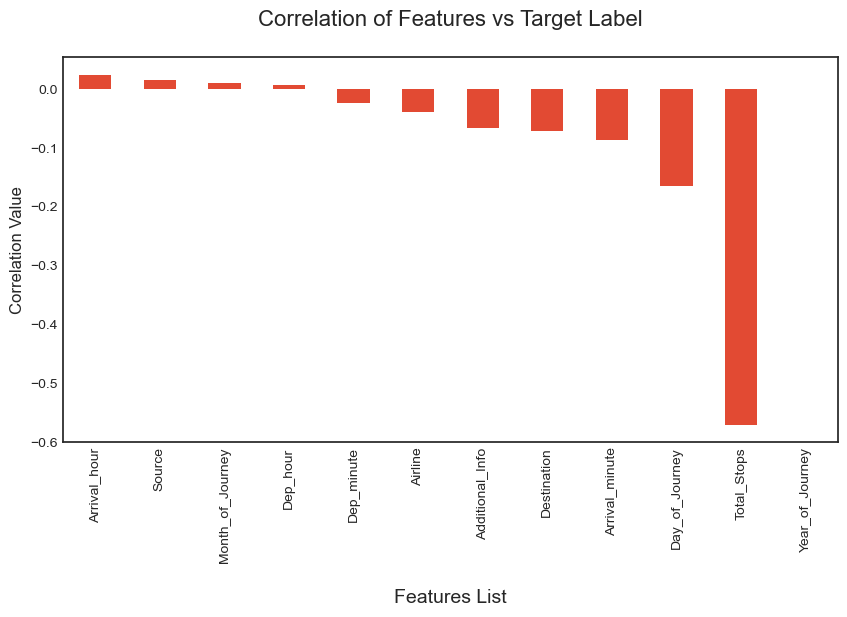

In [211]:
plt.style.use('seaborn-white')
df_corr = df_train.corr()
plt.figure(figsize=(10,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Target Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Observation: With the help of above plot, we can see the correlation between our Features and Target Label. Here we see that feature columns like arrival hour, source, month of journey and departure hours are positively correlated with our target and remaining feature columns are negatively correlated where Total_Stops is highly negatively correlated which indicates that as the number of Total Stops increases the price of that particular flight also increases and vice-versa.

# Checking Outliers:

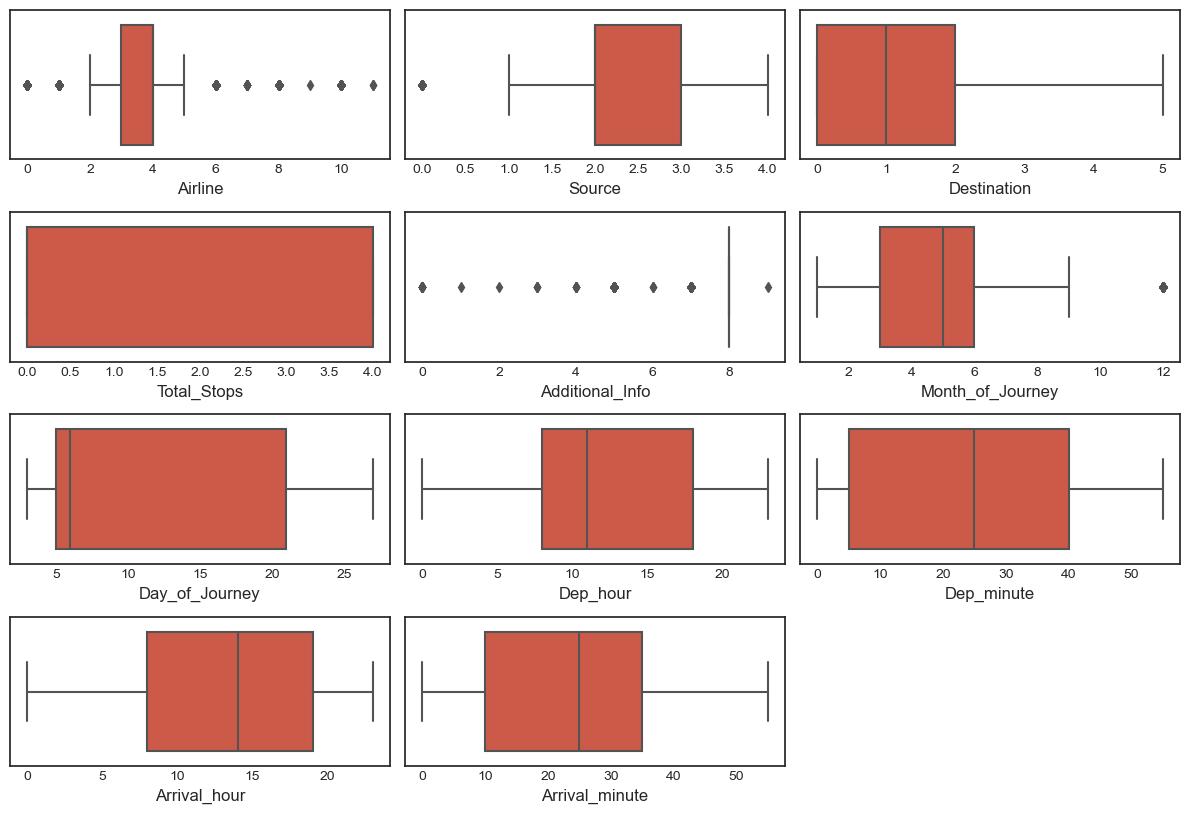

In [212]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: Using the boxplot to see the the outliers present in our dataset but since all of the feature columns are categorical data, we don't have to worry about the presence of outliers here.

# Checking skewness:

In [213]:
X.skew()

Airline             0.731095
Source             -0.424054
Destination         1.244169
Total_Stops         0.631681
Additional_Info    -1.779838
Month_of_Journey    0.629540
Day_of_Journey      0.367373
Dep_hour            0.113073
Dep_minute          0.167029
Arrival_hour       -0.369988
Arrival_minute      0.110945
dtype: float64

Remarks: Just like outliers, we don't remove skewness for categorical columns.

# Important Remarks:
Here, we are not going to scale the feature columns because there is not any continuous feature in X i.e., the feature columns are categorical so scaling the feature is not required.

# Training the models:

In [216]:
models={
    "XGB Regressor":XGBRegressor(),
    "Lasso":Lasso(),
    "ExtraTrees Regressor":ExtraTreesRegressor(),
    "RandomForest Regressor":RandomForestRegressor(),
    "Linear Regression":LinearRegression(),
    "DecisionTree Regressor":DecisionTreeRegressor(),
    "LIGHT GBM":LGBMRegressor()
}

# Finding the best model:

*************************************************** XGB Regressor ************************************************************
MEAN SQUARED ERROR 1832344.7281084755


MEAN ABSOLUTE ERROR 766.3224291725576


CVS_SCORE 0.894880305070662


R2_SCORE 0.909282805714198


RMSE 1353.6412848714667


MODEL PERFORMANCE CURVE


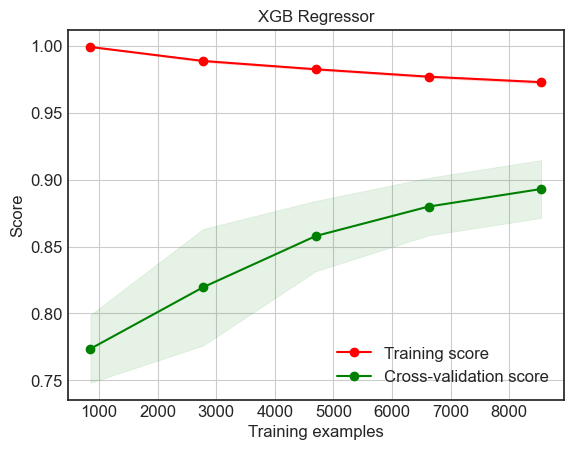

*************************************************** Lasso ************************************************************
MEAN SQUARED ERROR 12413868.25613985


MEAN ABSOLUTE ERROR 2609.2178706471004


CVS_SCORE 0.3678790530840093


R2_SCORE 0.38540424126790096


RMSE 3523.331982107257


MODEL PERFORMANCE CURVE


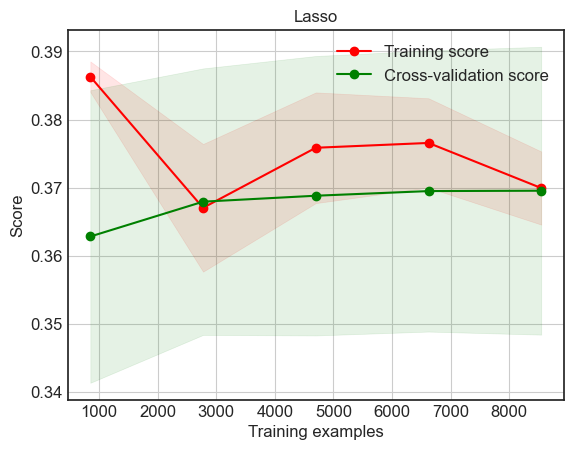

*************************************************** ExtraTrees Regressor ************************************************************
MEAN SQUARED ERROR 2087885.6567228814


MEAN ABSOLUTE ERROR 658.8122178887155


CVS_SCORE 0.890819935026391


R2_SCORE 0.8966312802051207


RMSE 1444.9517835287381


MODEL PERFORMANCE CURVE


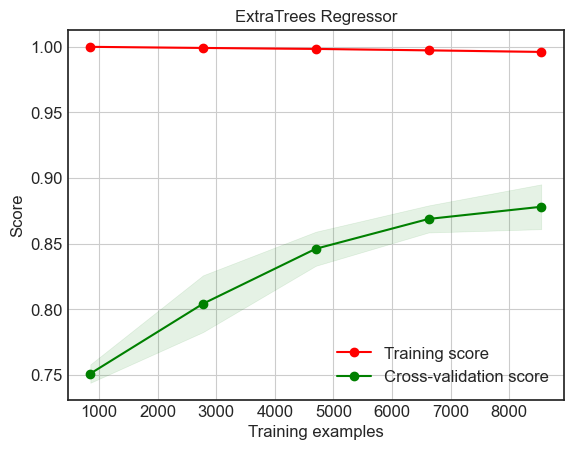

*************************************************** RandomForest Regressor ************************************************************
MEAN SQUARED ERROR 1968304.7861200527


MEAN ABSOLUTE ERROR 670.1840665081842


CVS_SCORE 0.8763570140835168


R2_SCORE 0.9025515859777908


RMSE 1402.9628598505567


MODEL PERFORMANCE CURVE


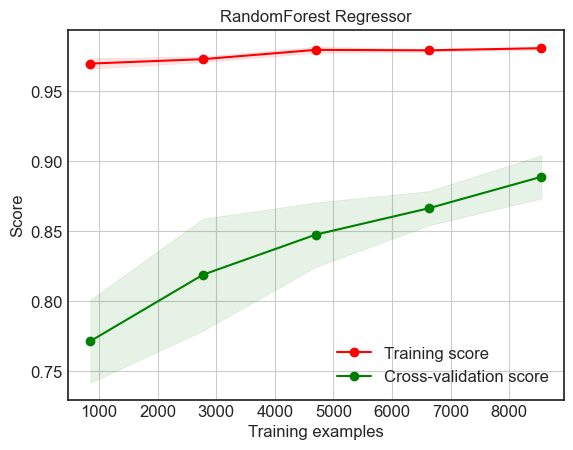

*************************************************** Linear Regression ************************************************************
MEAN SQUARED ERROR 12413993.742844012


MEAN ABSOLUTE ERROR 2609.2599387689156


CVS_SCORE 0.36829304303667415


R2_SCORE 0.3853980285713777


RMSE 3523.349790021424


MODEL PERFORMANCE CURVE


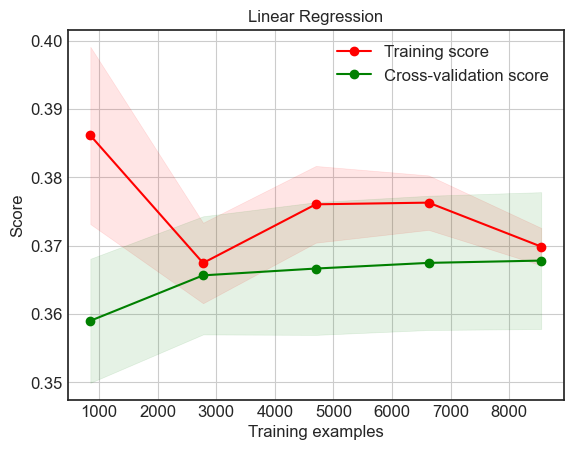

*************************************************** DecisionTree Regressor ************************************************************
MEAN SQUARED ERROR 4076692.4867828046


MEAN ABSOLUTE ERROR 759.4716068642746


CVS_SCORE 0.8155920773237442


R2_SCORE 0.798167834527122


RMSE 2019.0820901545346


MODEL PERFORMANCE CURVE


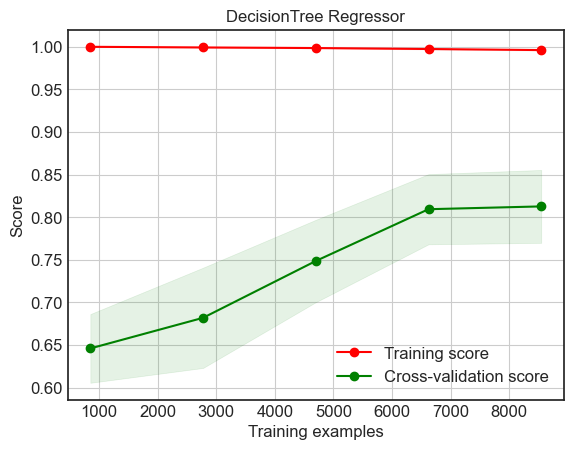

*************************************************** LIGHT GBM ************************************************************
MEAN SQUARED ERROR 2411596.947038205


MEAN ABSOLUTE ERROR 950.5863594904663


CVS_SCORE 0.861672455245869


R2_SCORE 0.8806047216839207


RMSE 1552.9317264574786


MODEL PERFORMANCE CURVE


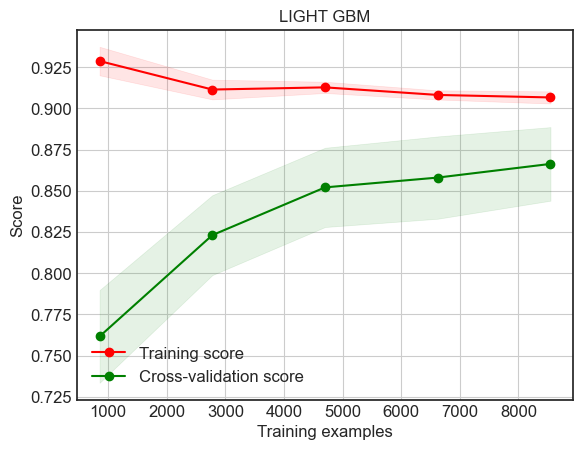

In [219]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
MODEL=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X,y,scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X,y,cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [221]:
#making a dataframe
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [222]:
models_result

,NAME,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,XGB Regressor,0.894880,0.909283,1.832345e+06,766.322429,1353.641285
1,Lasso,0.367879,0.385404,1.241387e+07,2609.217871,3523.331982
2,ExtraTrees Regressor,0.890820,0.896631,2.087886e+06,658.812218,1444.951784
3,RandomForest Regressor,0.876357,0.902552,1.968305e+06,670.184067,1402.962860
4,Linear Regression,0.368293,0.385398,1.241399e+07,2609.259939,3523.349790
5,DecisionTree Regressor,0.815592,0.798168,4.076692e+06,759.471607,2019.082090
6,LIGHT GBM,0.861672,0.880605,2.411597e+06,950.586359,1552.931726


# Remarks:
We will be selecting XGBRegressor as it is giving cross_val_Score of 0.89 .

# Hyperparameter tuning our best ML model:

In [223]:
XGB=XGBRegressor()

In [224]:
params={
    'booster':['gbtree','dart'],
    'importance_type':['gain','split'],
    'max_depth':[6,5,7],
    'n_estimators':[100,200,500]
}

In [225]:
Grid=GridSearchCV(estimator=XGB,param_grid=params,cv=kf,n_jobs=-1,scoring='r2')

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [226]:
Grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                

Remarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes

In [227]:
Grid.best_params_

{'booster': 'dart',
 'importance_type': 'gain',
 'max_depth': 6,
 'n_estimators': 200}

In [228]:
Grid.best_score_

0.8964036878944672

# Remarks:
After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 89.64%

In [229]:
XGBR=XGBRegressor(booster= 'dart',
 importance_type= 'gain',
 max_depth= 7,
 n_estimators= 200)

In [230]:
XGBR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Final Model Learning Curve:

MODEL PERFORMANCE CURVE


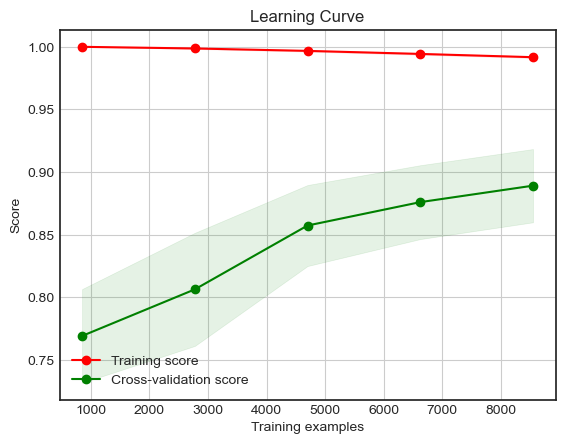

In [231]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(XGBR,X,y,cv=kf,scoring='r2')
plt.show()

In [233]:
y_pred=XGBR.predict(X_test)

# Final model metrics:

In [234]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score",r2_score(y_test,y_pred))
print("Model_Score",XGBR.score(X_test,y_test))

MSE 1986103.3859950078
MAE 702.6228279863616
RMSE 1409.2918029971677
R2_Score 0.9016703986018005
Model_Score 0.9016703986018005


# Saving the model:

In [235]:
joblib.dump(Grid,"Flight_Prediction.obj")

['Flight_Prediction.obj']

# Loading the model:

In [236]:
model=joblib.load('Flight_Prediction.obj')

In [237]:
model.predict(X_test)

array([10873.832 ,  6057.1963, 14659.062 , ...,  5853.1514,  3314.7197,
       10737.469 ], dtype=float32)

# Loading the Testing dataset:

In [238]:
df_test=pd.read_excel('Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Remarks: We have imported the test dataset that consists of feature columns only and we need to predict the target label. However, before applying our final regression model we need to perform all the pre-processing steps that we applied on our training dataset.

In [239]:
df_test=preprocess(df_test)
df_test=preprocess1(df_test)

In [240]:
#dropping a column 
df_test=df_test.drop(['Year_of_Journey'],axis=1)

In [241]:
df_test=ordinal_encoder(df_test,['Airline','Source','Destination','Total_Stops','Additional_Info'])

Remarks:We have applied Ordinal Encoder method since all our feature columns have values in an orderly manner.

# Testing data Price prediction:

In [242]:
model.predict(df_test)

array([10314.657 ,  3901.57  , 11809.94  , ..., 13755.014 , 10818.884 ,
        6586.7534], dtype=float32)

# Conclusion:

1. The training dataset was containing one continuous value which was our target column 'Price'.

2. We analysed the dataset and then we performed EDA to understand the data in a better way and have written the observation also.

3. We performed all the pre-processing from data cleaning to data transformation and also did Feature engineering.

4. Since all columns of the dataset was categorical so it was not required to remove outliers and skewness and also to scale the faeture columns.

5. After training multiple regression models, we selected XGBRegressor as our final model and performed hyperparameter tuning that increased the accuracy from

6. Finally we build a model to predict the flight price with accuracy of 89.64%. 